In [12]:
import pyscreenshot as ImageGrab
import time as time
import tkinter as tk
from PIL import ImageGrab
import os

# Folder to save images
images_folder = "captured_images/3/"
if not os.path.exists(images_folder):
    os.makedirs(images_folder)

# Set up the main window
root = tk.Tk()
root.title("Draw and Capture")

# Set up the canvas for drawing
canvas = tk.Canvas(root, width=400, height=400, bg='white')
canvas.pack()

# Variables to track the drawing state
last_x, last_y = None, None

# Functions to handle drawing
def start_draw(event):
    global last_x, last_y
    last_x, last_y = event.x, event.y

def draw(event):
    global last_x, last_y
    canvas.create_line((last_x, last_y, event.x, event.y), fill='black', width=5)
    last_x, last_y = event.x, event.y

def clear_canvas():
    canvas.delete("all")

# Bind the mouse events to the canvas
canvas.bind("<Button-1>", start_draw)
canvas.bind("<B1-Motion>", draw)

# Button to clear the canvas
clear_button = tk.Button(root, text="Clear", command=clear_canvas)
clear_button.pack()

# Function to capture and save the canvas content
capture_count =28
def capture_images():
    global capture_count
    if capture_count < 100:
        x = root.winfo_rootx() + canvas.winfo_x()
        y = root.winfo_rooty() + canvas.winfo_y()
        x1 = x + canvas.winfo_width()
        y1 = y + canvas.winfo_height()
        
        # Capture the canvas content
        im = ImageGrab.grab(bbox=(x, y, x1, y1))
        im.save(f"{images_folder}image_{capture_count}.png")
        print(f"We successfully saved: {capture_count}")
        capture_count=capture_count+1
        root.after(8000, capture_images)  # Schedule the next capture after 8 seconds

# Run the capture function after the canvas is set up with an 8-second delay for the first image
root.after(8000, capture_images)

# Run the tkinter main loop
root.mainloop()

We successfully saved: 28
We successfully saved: 29
We successfully saved: 30
We successfully saved: 31
We successfully saved: 32
We successfully saved: 33
We successfully saved: 34
We successfully saved: 35
We successfully saved: 36
We successfully saved: 37
We successfully saved: 38
We successfully saved: 39
We successfully saved: 40
We successfully saved: 41
We successfully saved: 42
We successfully saved: 43
We successfully saved: 44


In [13]:
import os
from PIL import Image

# Paths to the input and output folders
input_folder = 'captured_images/33/'
output_folder = 'captured_images/33/'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Target dimensions
target_width = 336
target_height = 279

# Function to crop the image to the target dimensions
def crop_to_target_size(image, target_width, target_height):
    width, height = image.size

    # Ensure the original image is large enough for the target size
    if width >= target_width and height >= target_height:
        left = (width - target_width) // 2
        upper = (height - target_height) // 2
        right = left + target_width
        lower = upper + target_height

        return image.crop((left, upper, right, lower))
    else:
        print(f"Image {image.filename} is too small for the target size.")
        return image  # Return the original image if it's too small

# Loop through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)

        # Open the image
        image = Image.open(image_path)

        # Crop the image to the specified dimensions
        cropped_image = crop_to_target_size(image, target_width, target_height)

        # Save the cropped image to the output folder
        output_path = os.path.join(output_folder, filename)
        cropped_image.save(output_path)

        print(f"Cropped and saved {filename} to {output_folder}")

print("Cropping completed for all images.")


Cropping completed for all images.


In [14]:
import cv2
import csv
import glob

# Define the header for the CSV file
header = ["label"] + [f"pixel{i}" for i in range(28 * 28)]  # Adjust for 28x28 pixels (784 total)

# Open the CSV file once for writing
with open('dataset.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
    # Iterate over labels (0-9)
    for label in range(10):
        dir_list = glob.glob(f"captured_images/{label}/*.png")  # Folder structure: captured_images/<label>/*.png
        
        for img_path in dir_list:
            try:
                # Read the image
                im = cv2.imread(img_path)
                
                # Check if the image was read successfully
                if im is None:
                    print(f"Skipping {img_path}: Unable to read the image.")
                    continue
                
                # Convert to grayscale
                im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                
                # Apply Gaussian blur to reduce noise
                im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
                
                # Resize to 28x28
                roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)
                
                # Optional: Invert colors if needed (for black on white images)
                # roi = cv2.bitwise_not(roi)
                
                # Binarize the image (thresholding)
                _, roi = cv2.threshold(roi, 100, 255, cv2.THRESH_BINARY)
                
                # Flatten the image and convert pixels to binary (0/1)
                data = [label] + [1 if pixel > 0 else 0 for pixel in roi.flatten()]
                
                # Write the data row to the CSV
                writer.writerow(data)
            
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

print("Dataset creation complete!")


Dataset creation complete!


In [15]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
644      6       0       0       0       0       0       0       0       0   
789      7       0       0       0       0       0       0       0       0   
684      6       0       0       0       0       0       0       0       0   
321      3       0       0       0       0       0       0       1       1   
495      4       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
615      5       0       0       0       0       0       0       0       0   
88       0       0       0       0       0       0       0       0       0   
749      7       0       0       0       0       0       0       0       0   
89       0       0       0       0       0       0       0       0       0   
948      9       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [16]:
X = data.drop(["label"],axis=1)
Y= data["label"]

3


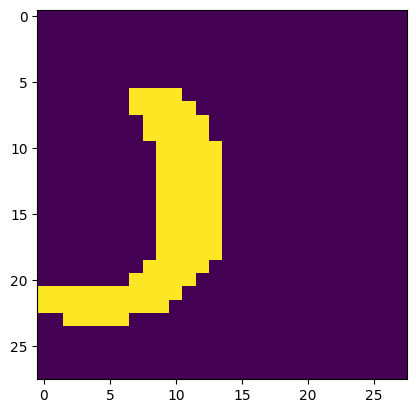

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [18]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [19]:
import os
os.makedirs("model", exist_ok=True)


In [20]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "./model/digit_recognizer")

['./model/digit_recognizer']

In [21]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.9117647058823529


In [22]:
#prediction of image drawn in paint
  
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
  
model=joblib.load("model/digit_recognizer")
image_folder="./img/"
  
while True:
   img=ImageGrab.grab(bbox=(60,470,400,870))
    
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
   rows,cols=roi.shape
    
   X = []
    
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
            
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 2


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\Tharun Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


KeyboardInterrupt: 